In [1]:
from watermark import watermark
# Imports
import sys
import os
import platform
from os.path import exists


In [2]:
# Report Technologies
print(f'Python Platform: {platform.platform()}')
print(f'Python {sys.version}')
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Python Platform: macOS-13.0.1-arm64-arm-64bit
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]
Last updated: 2023-05-03T16:45:55.304139-05:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.6.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

platform: 1.0.8
sys     : 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]



In [3]:
# Exploratory data anlysis
# Downloading assets/securities price data (i.e. S&P 500)

In [4]:
# import yfinance package as package for data source
import yfinance as yf  # call yahoo finance API in order to download daily stock and indices prices

In [5]:
# initialize a ticker class to enable download of pricing history for. single, i.e. specified symbol
sp500 = yf.Ticker('^GSPC')  # GSPC is the S&P500 index

In [6]:
# to query historical prices
sp500 = sp500.history(period = 'max') # 'max' allows to query ALL data from beginning of index creation in dataframe format

# visualize pandas dataframe
# each row representing data of a trading day with non-trading days excluded
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,0.0,0.0
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,0.0,0.0
2023-05-01 00:00:00-04:00,4166.790039,4186.919922,4164.120117,4167.870117,3321370000,0.0,0.0


In [7]:
# examine the dataframe index; note returns a 'date-time-index'
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-04-20 00:00:00-04:00', '2023-04-21 00:00:00-04:00',
               '2023-04-24 00:00:00-04:00', '2023-04-25 00:00:00-04:00',
               '2023-04-26 00:00:00-04:00', '2023-04-27 00:00:00-04:00',
               '2023-04-28 00:00:00-04:00', '2023-05-01 00:00:00-04:00',
               '2023-05-02 00:00:00-04:00', '2023-05-03 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23949, freq=None)

In [8]:
# initiate preliminary data cleaning and visualization

<AxesSubplot:xlabel='Date'>

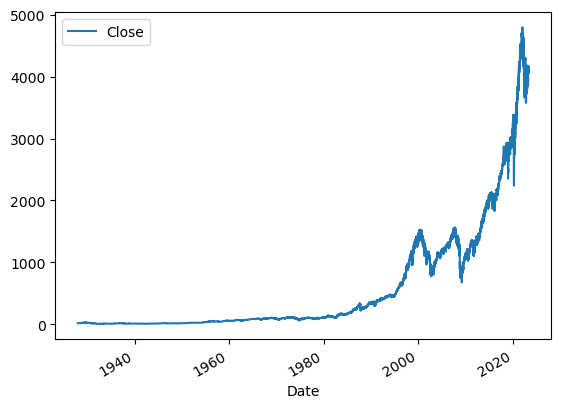

In [9]:
# visualize data frame data via plotting closing price column against the index
sp500.plot.line(y = 'Close', use_index = True)  # index values are x-axis and closing price is y-axis

In [10]:
# eliminate columns that provide zero value for our analysis of the S&P500 index
del sp500['Dividends']
del sp500['Stock Splits']

In [11]:
# Define target for Machine Learning, i.e. what we will actually utilize Machine Leanring to predict
# i.e. target / question is ~ will price go up or go down TOMORROW
# note, predicting direction will be both more successful and more advantagious / greater utility than attempting to predict absolute price

In [12]:
# create a new column in our dataframe to provide tomorrow's price
sp500['Tomorrow'] = sp500['Close'].shift(-1) # using pandas 'shift' we are taking the close column value and shifting it back to the previous rows 'tomorrow' column value

# visualize the new column with the 'Tomorrow' values 
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117
2023-05-01 00:00:00-04:00,4166.790039,4186.919922,4164.120117,4167.870117,3321370000,4119.580078


In [13]:
# utilizing 'Tomorrow's' price we will define our 'Target' as a new column in our dataframe
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']) # this line would provide a boolean, i.e. True or False
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int) # using '.astype' method convert to integer for Machine Learning usability

# visualize the new column with the 'Target' values changed from True or False to intger 1 or 0
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117,0
2023-05-01 00:00:00-04:00,4166.790039,4186.919922,4164.120117,4167.870117,3321370000,4119.580078,0


In [14]:
# clean or streamline our data by specifying a smaller range, i.e. how far back we will go for our starting point
# use pandas '.loc' method to specify use only those rows are at least the specified date or later,
# use pandas '.copy()' method method returns a copy of the DataFrame, meaning (by default) any changes made in the original DataFrame will NOT be reflected in the copy

sp500 = sp500.loc['1990-01-01':].copy() 

# visualize the dataframe with the defined starting row 
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-04-27 00:00:00-04:00,4075.290039,4138.240234,4075.290039,4135.350098,3750550000,4169.479980,1
2023-04-28 00:00:00-04:00,4129.629883,4170.060059,4127.180176,4169.479980,4087800000,4167.870117,0
2023-05-01 00:00:00-04:00,4166.790039,4186.919922,4164.120117,4167.870117,3321370000,4119.580078,0


In [15]:
# develop initial Machine Learning Model, i.e. training a 'random forest' model
# random forest, by design tendency towards resistance to 'overfitting'
# random forest generally relatively quick in operation
# random forest can identify or recognize 'non-linear' relationships of the data which is good in modeling securities

In [16]:
# import our first model package
from sklearn.ensemble import RandomForestClassifier

In [17]:
# initialize our model
# set random state, i.e. seed to specific value to ensure repeatability given specified start point of randomness
# n_estimators specify the number of random decision trees will use; generally accuracy improves with higher number of decision trees
# min_samples_split aids in further preventing 'overfitting'; the higher this value the lower the accuracy, however the higher value will decrease risk of overfit

seed = 42
model = RandomForestClassifier(n_estimators=185, min_samples_split = 100, random_state = seed)

In [18]:
# split data into 'training' and 'testing'
# need to split taking 'time series' nature into account, as random splitting will result in leakage, i.e. using tomorrow's data to predict today

train = sp500.iloc[:-100]  # training data set - training with all data rows EXCEPT for the most recent/ last 100 rows
test =  sp500.iloc[-100:]  # testing data set - testing on the last 100 rows

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']  # do NOT use 'Target' or 'Tomorrow' !!!
model.fit(train[predictors], train['Target'])  # training the modle using the specified 'predictors' columns, then attempt to predict the 'Target'

RandomForestClassifier(min_samples_split=100, n_estimators=185, random_state=42)

In [19]:
# assess the accuracy of the model - require metrics package/s
from sklearn.metrics import (classification_report, 
                             balanced_accuracy_score,
                             precision_score,
                             confusion_matrix,
                             roc_auc_score,
                             f1_score)

In [20]:
# generate predictions with the model using the '.predict()' method passing in 'test' set with the predictors.
preds = model.predict(test[predictors])

# visualize predictions (note, default will be in numpy array format) 
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [21]:
# turn the numpy array into a pandas series
import pandas as pd
preds = pd.Series(preds, index = test.index)

# visualize predictions as panda series 
preds

Date
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
2022-12-12 00:00:00-05:00    0
2022-12-13 00:00:00-05:00    0
2022-12-14 00:00:00-05:00    1
                            ..
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
2023-05-01 00:00:00-04:00    0
2023-05-02 00:00:00-04:00    1
2023-05-03 00:00:00-04:00    0
Length: 100, dtype: int64

In [22]:
confusion_matrix(test['Target'], preds)
classification_report(test['Target'], preds)

'              precision    recall  f1-score   support\n\n           0       0.51      0.84      0.63        51\n           1       0.47      0.14      0.22        49\n\n    accuracy                           0.50       100\n   macro avg       0.49      0.49      0.43       100\nweighted avg       0.49      0.50      0.43       100\n'

In [23]:
confusion_matrix(test['Target'], preds)

array([[43,  8],
       [42,  7]])

In [24]:
balanced_accuracy_score(test['Target'], preds)

0.49299719887955185

In [25]:
precision_score(test['Target'], preds)

0.4666666666666667

In [28]:
# generate a dataframe of actual values (i.e. test['Target'])and predicted values ('preds') concatenation
combined = pd.concat([test['Target'], preds], axis = 1)  #

# visualize dataframe of concatenated values
combined

,Target,0
Date,,
2022-12-08 00:00:00-05:00,0,0
2022-12-09 00:00:00-05:00,1,0
2022-12-12 00:00:00-05:00,1,0
2022-12-13 00:00:00-05:00,0,0
2022-12-14 00:00:00-05:00,0,1
...,...,...
2023-04-27 00:00:00-04:00,1,0
2023-04-28 00:00:00-04:00,0,0
2023-05-01 00:00:00-04:00,0,0


<AxesSubplot:xlabel='Date'>

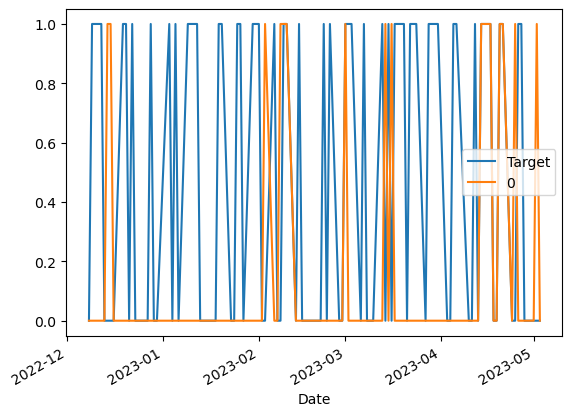

In [29]:
# visualize dataframe with plot graph
combined.plot()

In [30]:
# backtesting

In [32]:
# functionize the prediction model

def predict(train, test, predictors, model):
    # training the modle using the specified 'predictors' columns, then attempt to predict the 'Target'
    model.fit(train[predictors], train['Target'])
    # generate predictions with the model using the '.predict()' method passing in 'test' set with the predictors.
    preds = model.predict(test[predictors])
    # turn the numpy array into a pandas series and name it 'Predictions'
    preds = pd.Series(preds, index = test.index, name = 'Predictions') 
    # generate a dataframe of actual values (i.e. test['Target'])and predicted values ('preds') concatenation
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined   

In [35]:
# Backtest function
# every trading year ~ 250 days, thus start of 2500 would be ~ 10 years of data; i.e. starts ~ 10 years back => use 10 years of data to train FIRST model
# step is 250 which is ~ 1 year, ergo train the model for one year.  So, start by using 10 years data to train the 11th year, then 11 years of data to train the 12th year, etc...
def backtest(data, model, predictors, start=2500, step=250):
    # create empty list
    all_predictions = []
    
    # 'for loop' iterate through data year by year
    for i in range(start, data.shape[0], step):
        # make predictions for all years EXCEPT fist 10 years, etc...
        train = sp500.iloc[0:i].copy()                        # training data set - all of years preceding current year
        test =  sp500.iloc[i:(i+step)].copy()                 # testing data set - current year
        predictions = predict(train, test, predictors, model) # using the predict function
        all_predictions.append(predictions)                   # appending the empty list
    
    # combine the 'all_predictions'; i.e. takes a list of dataframes and combines into single dataframe
    return pd.concat(all_predictions)

In [36]:
# backtesting the S&P 500 data with the earlier created model and asociated predictors created earlier.
predictions = backtest(sp500, model, predictors)

In [37]:
# examine how many times predited market would go up and how many times predicted market would go down
predictions['Predictions'].value_counts()  # '.value_counts()' will provide a numeric count for how many of each type of prediction was made

0    3390
1    2509
Name: Predictions, dtype: int64

In [ ]:
# performance analytics

In [38]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5241131925069749

In [39]:
balanced_accuracy_score(predictions['Target'], predictions['Predictions'])

0.49185077437475666

In [40]:
# percentage of days market actually went up
predictions['Target'].value_counts() / predictions.shape[0] # value counts of the target divided by the total number of rows

1    0.53365
0    0.46635
Name: Target, dtype: float64

In [41]:
# note above, actual performance of market was better than what we predicted; i.e. market rose ~53% and Machine Learning model predicted ~52%

In [42]:
# expanding our predictors to use in model

In [43]:
#
horizons = [2, 5, 60, 250, 1000] # 2= two days, 5= one trading week, 60= three trading months, 250= one trading year, 1000= four trading years
new_predictors = []

# 'for loop' through the horizons
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f'Close_Ratio_{horizon}'
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    